# Analysis

##### Observed trend 1: On November 5, 2017, overall sentiment polarity is positive for BBC and CBS tweets and negative for Fox News and CNN. For NY Times, the tweet sentiment is almost neutral. 

##### Observed trend 2: From the overall media sentiment based on tweets, CBS is most positive at 23% and BBC is the second most positive with 7.7%.

##### Observed trend 3: The results also show that CNN is most negative with 14.9 % negative polarity and Fox News is second with 13%.NY Times has 3.1% negative polarity, which the closest to neutral.

In [45]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
from datetime import datetime

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Get sentiments data from Media Tweets and creat dataframe

In [46]:
# Target Search Term
target_terms = ("BBC", "CBS", "CNN",
                "FoxNews", "nytimes")


In [47]:
# Array to hold sentiment
sentiments_all = []
# Counter
counter = 1


In [48]:
# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target, page=x)
        # Loop through all tweets 
        for tweet in public_tweets:
        
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)


            # Add sentiments for each tweet into an array
            sentiments_all.append({"User": target, 
                           "Source account": tweet["source"],
                           "Date": tweet["created_at"],        
                           "Text": tweet["text"],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
            
            
            # Add to counter 
            counter = counter + 1
    
    

print(sentiments_all)
print("")


[{'User': 'BBC', 'Source account': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Date': 'Sun Nov 05 22:27:18 +0000 2017', 'Text': 'RT @BBCSport: Some sad news to bring you.\n\nFormer Stoke City defender Dionatan Teixeira has died at the age of 25.\n\nhttps://t.co/L2KH7PCvqD…', 'Compound': -0.743, 'Positive': 0.052, 'Negative': 0.701, 'Neutral': 0.247, 'Tweets Ago': 1}, {'User': 'BBC', 'Source account': '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>', 'Date': 'Sun Nov 05 21:32:03 +0000 2017', 'Text': '🤦😂 @LiamPayne &amp; @gregjames, a fake moustache and a lift. What could possibly go wrong? #SLFN is on @BBCiPlayer now.… https://t.co/wA9yBPWNHQ', 'Compound': -0.7351, 'Positive': 0.0, 'Negative': 0.733, 'Neutral': 0.267, 'Tweets Ago': 2}, {'User': 'BBC', 'Source account': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Date': 'Sun Nov 05 20:49:53 +0000 2017', 'Text': 'RT @BBCOne: Q: How many tickles does it take to mak

In [49]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments_all)
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Source account,Text,Tweets Ago,User
0,-0.7430,Sun Nov 05 22:27:18 +0000 2017,0.701,0.247,0.052,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @BBCSport: Some sad news to bring you.\n\nF...,1,BBC
1,-0.7351,Sun Nov 05 21:32:03 +0000 2017,0.733,0.267,0.000,"<a href=""https://studio.twitter.com"" rel=""nofo...","🤦😂 @LiamPayne &amp; @gregjames, a fake moustac...",2,BBC
2,0.5574,Sun Nov 05 20:49:53 +0000 2017,0.825,0.000,0.175,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @BBCOne: Q: How many tickles does it take t...,3,BBC
3,0.3818,Sun Nov 05 20:47:59 +0000 2017,0.714,0.109,0.176,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @bbcstrictly: That shock result has left us...,4,BBC
4,0.2732,Sun Nov 05 20:46:18 +0000 2017,0.826,0.000,0.174,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","RT @BBCTwo: Well, you don't see that every day...",5,BBC
5,0.4404,Sun Nov 05 20:46:10 +0000 2017,0.707,0.000,0.293,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @BBCOne: Can’t beat a good accessory. 👑 #Bl...,6,BBC
6,0.5574,Sun Nov 05 20:46:01 +0000 2017,0.825,0.000,0.175,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @BBCPanorama: Watch our #paradisepapers inv...,7,BBC
7,-0.6705,Sun Nov 05 20:08:11 +0000 2017,0.809,0.191,0.000,"<a href=""http://twitter.com/download/iphone"" r...",RT @BBCBreaking: At least 27 people killed in ...,8,BBC
8,0.0000,Sun Nov 05 19:35:03 +0000 2017,1.000,0.000,0.000,"<a href=""http://www.radian6.com"" rel=""nofollow...",🎥 @LouisTheroux meets disaffected former membe...,9,BBC
9,-0.4215,Sun Nov 05 19:02:04 +0000 2017,0.797,0.203,0.000,"<a href=""https://studio.twitter.com"" rel=""nofo...",When your other half cheats on you with #Stran...,10,BBC


In [50]:
sentiments_pd= sentiments_pd.set_index("User")
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Source account,Text,Tweets Ago
User,,,,,,,,
BBC,-0.7430,Sun Nov 05 22:27:18 +0000 2017,0.701,0.247,0.052,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @BBCSport: Some sad news to bring you.\n\nF...,1
BBC,-0.7351,Sun Nov 05 21:32:03 +0000 2017,0.733,0.267,0.000,"<a href=""https://studio.twitter.com"" rel=""nofo...","🤦😂 @LiamPayne &amp; @gregjames, a fake moustac...",2
BBC,0.5574,Sun Nov 05 20:49:53 +0000 2017,0.825,0.000,0.175,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @BBCOne: Q: How many tickles does it take t...,3
BBC,0.3818,Sun Nov 05 20:47:59 +0000 2017,0.714,0.109,0.176,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @bbcstrictly: That shock result has left us...,4
BBC,0.2732,Sun Nov 05 20:46:18 +0000 2017,0.826,0.000,0.174,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","RT @BBCTwo: Well, you don't see that every day...",5


# Save the DataFrame as a csv

In [51]:
sentiments_pd.to_csv("../Instructions/media_sentiments_analysis.csv", encoding="utf-8", index=False)



# Sentiment Analysis of Media Tweets

In [54]:
BBC_compound = sentiments_pd.loc["BBC", "Compound"]
CBS_compound = sentiments_pd.loc["CBS", "Compound"] 
CNN_compound = sentiments_pd.loc["CNN", "Compound"] 
Fox_compound = sentiments_pd.loc["FoxNews", "Compound"] 
nytimes_compound = sentiments_pd.loc["nytimes", "Compound"] 
BBC_compound =BBC_compound.reset_index()
CBS_compound =CBS_compound.reset_index()
CNN_compound =CNN_compound.reset_index()
Fox_compound =Fox_compound.reset_index()
nytimes_compound =nytimes_compound.reset_index()


In [55]:
Compound_df=pd.concat([BBC_compound, CBS_compound, CNN_compound, Fox_compound,nytimes_compound],axis=1)
Compound_df
Compound_df.columns.values[1] = 'BBC Compound' 
Compound_df.columns.values[3] = 'CBS Compound'
Compound_df.columns.values[5] = 'CNN Compound'
Compound_df.columns.values[7] = 'FoxNews Compound'
Compound_df.columns.values[9] = 'NYtimes Compound'
Compound_df.head()

,User,BBC Compound,User,CBS Compound,User,CNN Compound,User,FoxNews Compound,User,NYtimes Compound
0,BBC,-0.7430,CBS,0.4199,CNN,-0.4215,FoxNews,0.0000,nytimes,0.1779
1,BBC,-0.7351,CBS,0.0000,CNN,-0.4767,FoxNews,0.8086,nytimes,-0.6486
2,BBC,0.5574,CBS,0.0000,CNN,-0.7783,FoxNews,-0.6705,nytimes,0.4215
3,BBC,0.3818,CBS,0.6166,CNN,0.2500,FoxNews,-0.2263,nytimes,0.0000
4,BBC,0.2732,CBS,0.0000,CNN,0.0000,FoxNews,0.4215,nytimes,0.5267


# Create plot

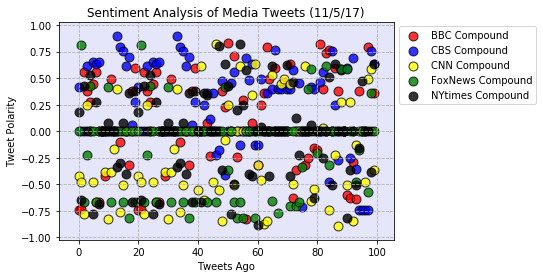

In [56]:

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_facecolor('lavender')
BBC = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["BBC Compound"], marker="o", color="red", edgecolors="k",
         alpha=0.8, s=80 ) 
CBS = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["CBS Compound"], marker="o", color="blue", edgecolors="k",
         alpha=0.8,s=80)
CNN = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["CNN Compound"], marker="o", color="yellow", edgecolors="k",
         alpha=0.8 ,s=80)
Fox = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["FoxNews Compound"], marker="o", color="green", edgecolors="k",
         alpha=0.8,s=80)
nytimes = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["NYtimes Compound"], marker="o", color="black", edgecolors="k",
         alpha=0.8,s=80)
# # Incorporate the other graph properties

plt.title("Sentiment Analysis of Media Tweets (11/5/17)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True, linestyle='dashed')
plt.legend((BBC, CBS, CNN, Fox, nytimes), ("BBC Compound","CBS Compound","CNN Compound","FoxNews Compound","NYtimes Compound"),
           loc='lower left',
           bbox_to_anchor=(1, 0.6))
plt.savefig("Sentiment_Analysis_of_Media_Tweets_11_5_2017")     
plt.show()

In [59]:
average_BBC = Compound_df["BBC Compound"].mean()
average_CBS = Compound_df["CBS Compound"].mean()
average_CNN = Compound_df["CNN Compound"].mean()
average_Fox = Compound_df["FoxNews Compound"].mean()
average_nytimes = Compound_df["NYtimes Compound"].mean()

averages = {'Compound': pd.Series([average_BBC,average_CBS,average_CNN, average_Fox, average_nytimes],index=['BBC','CBS','CNN','FoxNews','NYtimes'] )}
Compound_mean_df = pd.DataFrame(averages)
Compound_mean_df=Compound_mean_df.reset_index()
Compound_mean_df

,index,Compound
0,BBC,0.077137
1,CBS,0.230502
2,CNN,-0.149780
3,FoxNews,-0.130337
4,NYtimes,-0.031340


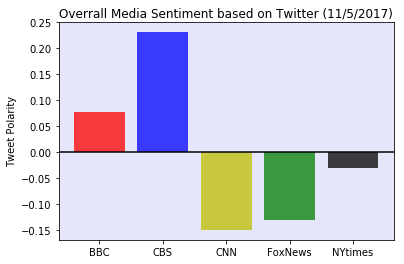

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_axis = np.arange(0, len(Compound_mean_df["index"]))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)
ax.bar(x_axis, Compound_mean_df["Compound"], alpha=0.75, color="rbygk", align="edge")    

ax.set_ylabel('Tweet Polarity')
ax.set_title("Overrall Media Sentiment based on Twitter (11/5/2017)")
ax.set_facecolor('lavender')
plt.xticks(tick_locations, Compound_mean_df["index"])
plt.axhline(0, color='k')
plt.savefig("Overrall_Media_Sentiment_based_on_Twitter_11_5_2017")
plt.show()